<a href="https://colab.research.google.com/github/trinexus2002/CD_databits/blob/main/08_Regresi%C3%B3n_Log%C3%ADstica_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

# <center>  Regresión Logística </center>

## Descripción
Esta sección analiza la Regresión Logística para solventar tareas de clasificación

## Contenido
* Importación de librerias y módulos
* Carga dataset de trabajo
* Análisis exploratorio de datos
* Desarrollo del modelo

## Requisitos previos

* Haber completado los cursos:
  - Introducción a Python
  - Estadística para Ciencia de Datos
  - Introducción a Machine Learning

<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Importar y verificar versión actual de librerías

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns

print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Scikit-learn:', sk.__version__)

Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
NumPy: 1.21.6
Pandas: 1.3.5
Seaborn: 0.11.2
Matplotlib: 3.2.2
Scikit-learn: 1.0.2


## 1. Importar módulos específicos de librerías:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## 2. Dataset de Trabajo

**df_customer:** El conjunto de datos se refiere a clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias en diversas canales de venta (channel= Horeca o Minorista).

<a href='https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/Wholesale_customers_data_procesado.csv'>
  Link para descargar el dataset Wholesale customers data</a>
  


**Objetivo de Clasificación:** Predecir los clientes que comprarán a través del canal Horeca (**Channel = 1**) y los que comprarán en el canal minorista (**Channel = 0**).

$$Pr (\text{Channel} = \text{1} | \text{fresh, milk, grocery, frozen, etc})= Pr(y = 1|X) $$
$$p(X) = Pr(y = 1|X)$$

**Diccionario de datos**

1. Fresh: gasto anual en productos frescos (medido en unidades monetarias)
2. Milk: gasto anual en productos lácteos (medido en unidades monetarias)
3. Grocery: gasto anual en productos comestibles (medido en unidades monetarias)
4. Frozen: gasto anual en productos congelados (medido en unidades monetarias)
5. Detergents_Paper: gasto anual en detergentes y productos de papel (medido en unidades monetarias)
6. Delicassen: gasto anual en productos delicatessen (medido en unidades monetarias)
7. Channel: Canal de clientes: Horeca (Hotel / Restaurante / Café) == 1 o Canal minorista == 2
8. Region: Región de clientes: Lisboa == 1, Oporto == 2, Otro == 3

In [4]:
# Carga dataset
df_customer = pd.read_csv('https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/Wholesale_customers_data.csv')
df_customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df_customer.shape

(440, 8)

### 2.1 Análisis exploratorio de datos

In [6]:
# Análisis descriptivo
df_customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
# Analizar presencia de valores faltantes
df_customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# Contabilizar las categorías en la variable objetivo
df_customer.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [9]:
# Analizar el balanceamiento de las categorías por canal
df_customer.Channel.value_counts(normalize=True)

1    0.677273
2    0.322727
Name: Channel, dtype: float64

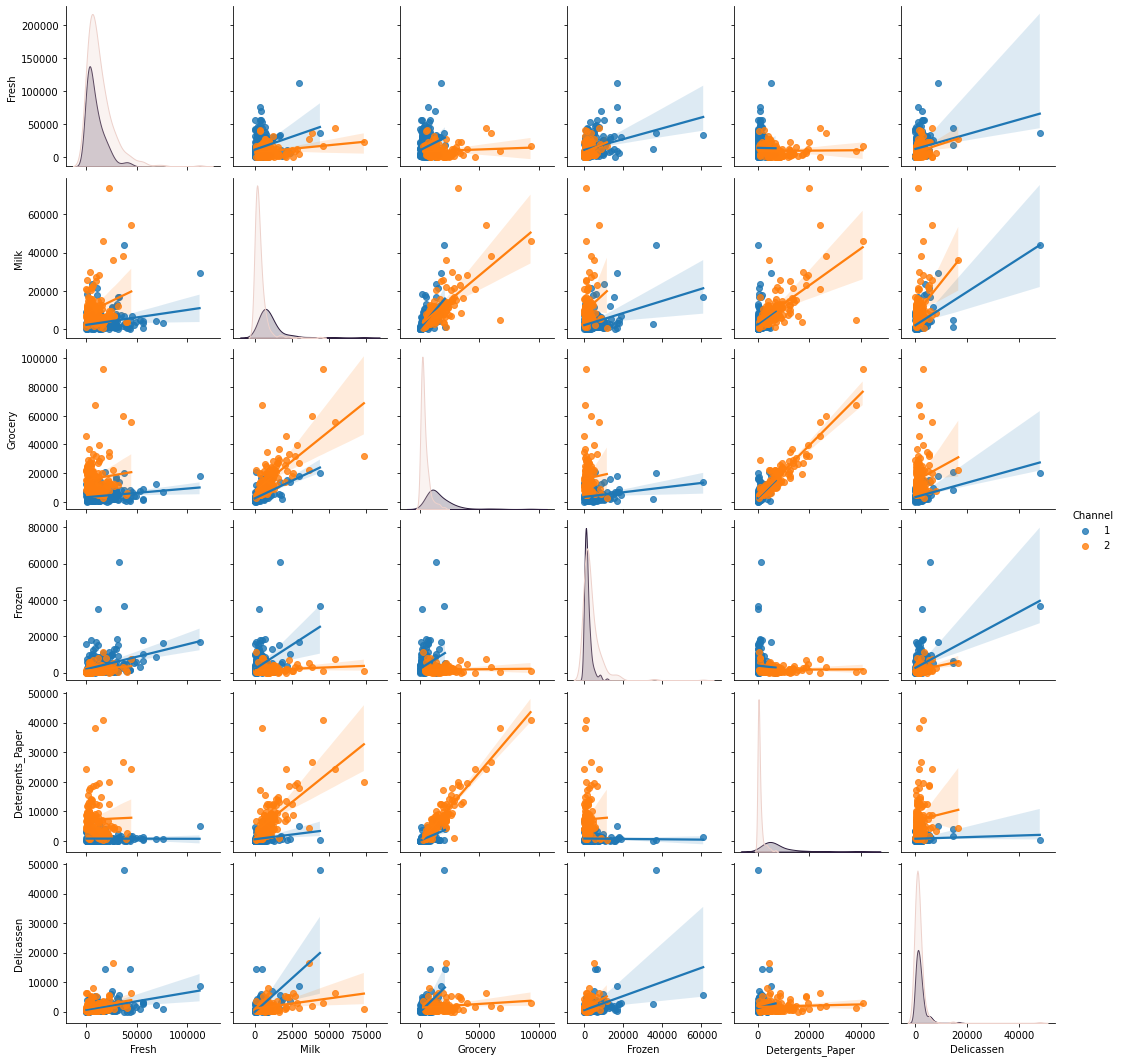

In [10]:
# Análisis visual.   # scatter, kde, hist, reg
sns.pairplot(df_customer, 
             hue='Channel',
             kind = 'reg',
             x_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'],
             y_vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [11]:
# Correlaciones entre los predictores del gasto por productos
df_customer.iloc[:, 2:].corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


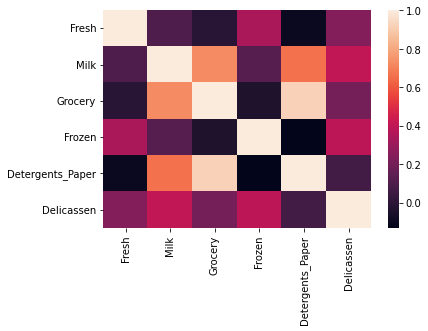

In [12]:
sns.heatmap(df_customer.iloc[:, 2:].corr())

## 3. Desarrollo del Modelo

### 3.1 Preparación de los datos correspondientes a las variables ```y , X```

In [13]:
df_customer['Channel']

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [14]:
#  Transformar en una variable binaria
y = df_customer['Channel'].map({2:1, 1:0}) #Si es HORECA colocar 1, si es minorista 0
y

0      1
1      1
2      1
3      0
4      1
      ..
435    0
436    0
437    1
438    0
439    0
Name: Channel, Length: 440, dtype: int64

In [15]:
X = df_customer.loc[:, ['Milk', 'Detergents_Paper', 'Delicassen']]
print(X.shape, y.shape)

(440, 3) (440,)


### 3.2 División de los datos: Training y Test

**```random_state```** <br>
- Este parámetro inicializa el generador aleatoreo de números que indicará los índices de división los datos en las porciones de Training y Test. 
- Para obtener las mismas divisiones de datos en diferentes computadoras y ejecuciones, fijamos este parámetro en un mismo valor, conocido como valor semilla. En nuestros ejercicios utilizaremos la semilla 0.

In [16]:
# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(352, 3) (352,)
(88, 3) (88,)


### 3.3 Creación del algoritmo

En la regresión logística, aumentar una característica dada "X" en una unidad aumenta las probabilidades logarítmicas por el coeficiente correspondiente.

![](https://www.reneshbedre.com/assets/posts/logit/logit_formula.webp?ezimgfmt=rs:900x399/rscb1/ng:webp/ngcb1)

[Explicacion de los parámetros de la regresión logística](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451) y [Documentación Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


El hiperparámetro C es el inverso de la regularización en la Regresión Logística. 

$$C = 1 / λ$$
Es un término de penalización, destinado a desincentivar y regular el sobreajuste. A medida que aumenta su valor se reduce la regularización.

In [28]:
C = 1
reg_logistica = LogisticRegression(C=C,
                                   multi_class = 'auto',
                                   class_weight='balanced', 
                                   random_state=0, 
                                   n_jobs=-1) 

reg_logistica

LogisticRegression(C=1, class_weight='balanced', n_jobs=-1, random_state=0)

### 3.4 Ajuste del algoritmo

In [32]:
reg_logistica.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', n_jobs=-1, random_state=0)

In [33]:
print('Intercepto', reg_logistica.intercept_)  # Ecuacion de la recta
print('Pendientes', reg_logistica.coef_.round(4))  # Pendiente por cada variable que tenemos es el coeficiente

Intercepto [-4.09770497]
Pendientes [[ 0.0002  0.0014 -0.0001]]


In [34]:
from math import exp
# Calculo las probabilidades de la misma forma que hago con la recta en una ecuacion lineal.  por ej con detergente , y tiene valor de 5000 .  es decir si compro 5000 dolares en detergentes
# le agrego la pendiente multiplicada por el valor del interes y le sumo el intersecto. 
print(reg_logistica.intercept_[0] + reg_logistica.coef_[0][1] * 5000)
odds = exp(reg_logistica.intercept_[0] + reg_logistica.coef_[0][1] * 5000)     # Exponenciar la fórmula ya que la regresión logística es logaritmo de odds
probabilidad = odds/(odds+1)   # Convertir odds a probabilidades

print("Predicción de los odds de HORECA: {} a 1".format( round(odds, 1) ))
print("Predicción de las probabilidades de HORECA: {}".format(probabilidad))

# Otro caso por ej, compra 1000 en leche, 300 en detergente, y 2000 en delicasen
odds = exp(reg_logistica.intercept_[0] + reg_logistica.coef_[0][0] * 1000 + reg_logistica.coef_[0][1] * 300 + + reg_logistica.coef_[0][2] * 2000)      # Exponenciar la fórmula ya que la regresión logística es logaritmo de odds
probabilidad = odds/(odds+1)   # Convertir odds a probabilidades

print("Predicción de los odds de HORECA: {} a 1".format( round(odds, 1) ))
print("Predicción de las probabilidades de HORECA: {}".format(probabilidad))

# Otro caso por ej, compra 1000 en leche, 3000 en detergente, y 2000 en delicasen.   50% de posibilidad de ser mayorista
odds = exp(reg_logistica.intercept_[0] + reg_logistica.coef_[0][0] * 1000 + reg_logistica.coef_[0][1] * 3000 + + reg_logistica.coef_[0][2] * 2000)      # Exponenciar la fórmula ya que la regresión logística es logaritmo de odds
probabilidad = odds/(odds+1)   # Convertir odds a probabilidades

print("Predicción de los odds de HORECA: {} a 1".format( round(odds, 1) ))
print("Predicción de las probabilidades de HORECA: {}".format(probabilidad))


2.8994281017930508
Predicción de los odds de HORECA: 18.2 a 1
Predicción de las probabilidades de HORECA: 0.9478181587102268
Predicción de los odds de HORECA: 0.0 a 1
Predicción de las probabilidades de HORECA: 0.022748005935138305
Predicción de los odds de HORECA: 1.0 a 1
Predicción de las probabilidades de HORECA: 0.5045460758075617


### 3.5 Prediccion en test a partir del algoritmo entrenado

La predicción por defecto emplea el punto de corte de 0.5

In [35]:
# Predecir con training para analizar overfitting
yHat_train = reg_logistica.predict(X_train)
yHat_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [22]:
# Evaluar desempeño algortimo al prededir con test
yHat_test = reg_logistica.predict(X_test)
yHat_test

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# # Definimos un punto de corte
# punto_corte= 0.3

# # Determinamos que se cumple la condición cuando la probabilidad es mayor al punto de corte
# yHat_bool = reg_logistica.predict_proba(X_test)[:,1] >= punto_corte  

# # Transformar respuesta booleana a binaria numérica (1 y 0)
# yHat = yHat_bool*1
# print(yHat)

### 3.6 Evaluación del algoritmo

#### 3.6.1 Métricas

En tareas o algoritmos de clasificación utilizamos los siguientes conceptos para evaluar los resultados obtenidos: <br>

- (TP): Numero de Verdaderos Positivos obtenidos
- (TN): Numero de Verdaderos Negativos obtenidos
- (FP): Numero de Falsos Positivos obtenidos
- (FN): Numero de Falsos Negativos obtenidos

Con estos términos, recordemos las definiciones de las métricas de evaluación de un algoritmo de ML:

- Accuracy ***(Exactitud)*** = TP + TN / (TP + TN + FP + FN)
- Precision ***(Precision)*** = TP / (TP + FP)
- Recall ***(Sensitividad / Verdaderos Positivos)*** = TP / (TP + FN) <br>

A continuación calculamos estas métricas para nuestro modelo:

In [23]:
#Análisis Overfitting
print('Exactitud (Accuracy):', metrics.accuracy_score(y_train, yHat_train))
print('Precision (Precision):', metrics.precision_score(y_train, yHat_train))
print('Sensitividad (Recall):', metrics.recall_score(y_train, yHat_train))

Exactitud (Accuracy): 0.9232954545454546
Precision (Precision): 0.8536585365853658
Sensitividad (Recall): 0.9210526315789473


In [24]:
#Métrica de evaluación desempeño algoritmo
print('Exactitud (Accuracy):', metrics.accuracy_score(y_test, yHat_test))
print('Precision (Precision):', metrics.precision_score(y_test, yHat_test))
print('Sensitividad (Recall):', metrics.recall_score(y_test, yHat_test))

Exactitud (Accuracy): 0.8522727272727273
Precision (Precision): 0.7419354838709677
Sensitividad (Recall): 0.8214285714285714


#### 3.6.2 Matriz de Confusión
Es un resumen de conteos de los resultados de la clasificación. En nuestro caso este resultado se muestra en una matriz de 2 filas y 2 columnas, donde cada (fila,columna) representan:

- (1,1) indica cuantos ```Defaults Falsos (0) ``` fueron clasificados correctamente como ```Falsos(0)```
- (1,2) indica cuantos ```Defaults Falsos (0) ``` fueron clasificados erroneamente como ```Verdaderos(1)```
- (2,1) indica cuantos ```Defaults Verdaderos (1) ``` fueron clasificados erroneamente como ```Falsos(0)```
- (2,2) indica cuantos ```Defaults Verdaderos (1) ``` fueron clasificados correctamente como ```Verdaderos(1)```

Text(0.5, 24.0, 'yHat')

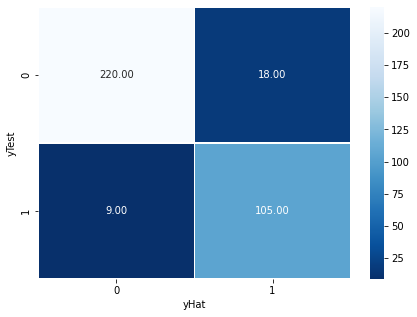

In [25]:
# Matriz de Confusion . Sobre train , que realmente no es necesario ya que fue el que aprendio
matriz_confusion = metrics.confusion_matrix(y_train, yHat_train)

# Graficar la matriz de Confusion
plt.figure(figsize=(7, 5))
plot_matriz = sns.heatmap(matriz_confusion, annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('yTest')
plt.xlabel('yHat')

Text(0.5, 24.0, 'yHat')

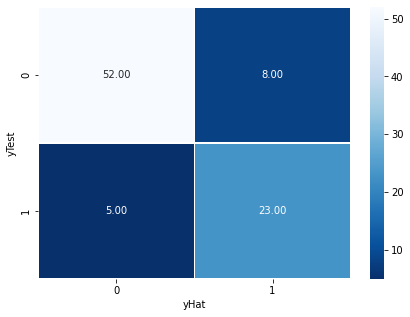

In [ ]:
# Matriz de Confusion
matriz_confusion = metrics.confusion_matrix(y_test, yHat_test)

# Graficar la matriz de Confusion
plt.figure(figsize=(7, 5))
plot_matriz = sns.heatmap(matriz_confusion, annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('yTest')
plt.xlabel('yHat')

#### 3.6.3 Curva ROC (Receiver-Operating-Characteristic)

Representa el desempeño del clasificador en términos de la relación entre el número de Falsos Positivos vs. el número de Verdaderos Positivos, para distintos puntos de corte.

**El área que se forma bajo esta curva es un indicador de la exactitud del clasificador: debe ser cercana a 1 para indicar un buen desempeño.** <br>

- Mientras más rápido converge esta curva hacia 1, la clasificación es mejor. <br>
- Si la curva se encuentra por debajo de la recta ```y=x``` (AUC <= 0.5), el clasificador no es mejor que el azar (es trivial).

In [26]:
# Cálculo de FPR, Recall(TPR) y puntos de corte:
scores = reg_logistica.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, scores)

# Calculo métrica ROC-AUC
aucROC = metrics.auc(fpr, tpr)
print(aucROC)

0.8886904761904763


Text(0.5, 1.0, 'Curva ROC C= 1')

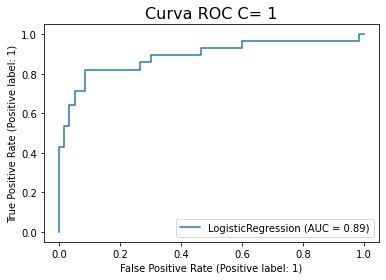

In [36]:
# Graficar la curva ROC
curva_roc = metrics.RocCurveDisplay.from_estimator(reg_logistica, X_test, y_test)
plt.title('Curva ROC C= ' + str(C), fontsize=16)

>**Ejercicio:** Replicar el ejercio anterior realizando las siguientes modificaciones: 

1. Configurar el algoritmo con el parámetro `C` con el valor de 0.003, 0.03, 0.06, 0.1, 0.13, 0.16, 0.6
2. Ajustar el nuevo algoritmo con los datos de entrenamiento
3. Realizar las predicciones para los datos de training y test
4. Obtener la métrica del accuracy (exactitud) para los datos de training y test
5. Analizar la posible existencia de overfitting
6. Imprimir la matriz de confusión para los datos de test
7. Comparar el resultado de la evaluación con respecto a la ejecución anterior:
  * Matriz de confusión | Accuracy en test

0.8886904761904763
0.8886904761904763
0.8886904761904763
0.8886904761904763
0.8886904761904763
0.8886904761904763
0.8886904761904763
0.8886904761904763


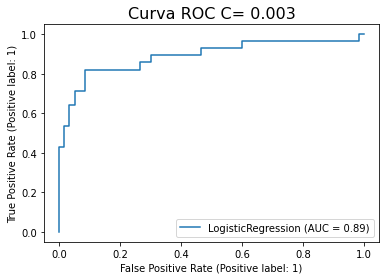

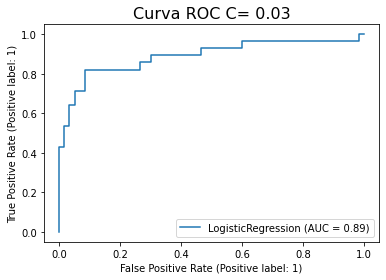

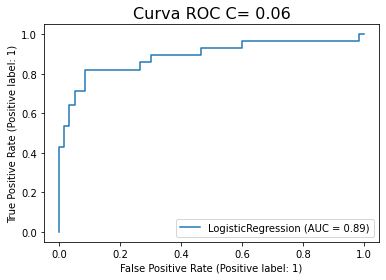

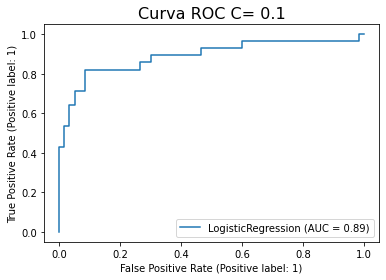

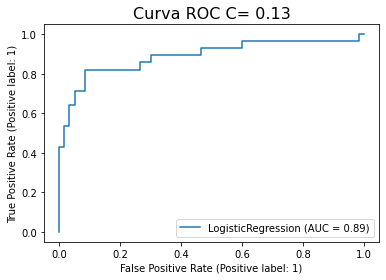

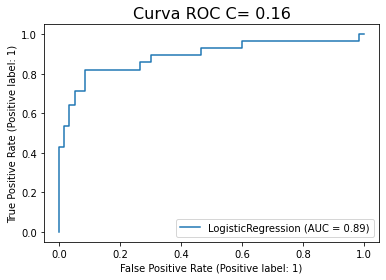

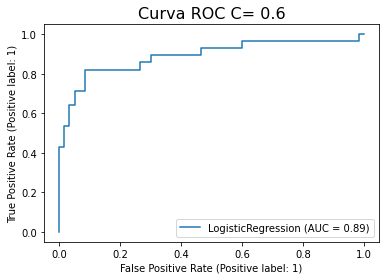

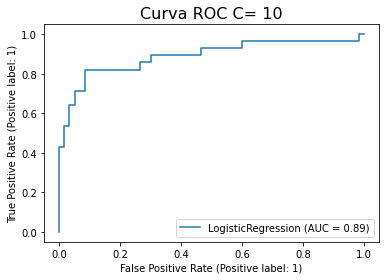

In [44]:
# Su código aquí
for i in [0.003, 0.03, 0.06, 0.1, 0.13, 0.16, 0.6,10]:
  C = i
  reg_logistica = LogisticRegression(C=C,
                                     multi_class = 'auto',
                                     class_weight='balanced', 
                                     random_state=0, 
                                     n_jobs=-1) 

  reg_logistica.fit(X_train, y_train)
  # Predecir con training para analizar overfitting
  yHat_train = reg_logistica.predict(X_train)
  # Evaluar desempeño algortimo al prededir con test
  yHat_test = reg_logistica.predict(X_test)
  # Cálculo de FPR, Recall(TPR) y puntos de corte:
  scores = reg_logistica.predict_proba(X_test)[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, scores)
  # Calculo métrica ROC-AUC
  aucROC = metrics.auc(fpr, tpr)
  print(aucROC)
  # Graficar la curva ROC
  curva_roc = metrics.RocCurveDisplay.from_estimator(reg_logistica, X_test, y_test)
  plt.title('Curva ROC C= ' + str(C), fontsize=16)

### Fin


<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>